# **Lab - 5**

**ID:** 180041120

**Course Code:** 4734

**Course Name:** Digital Image Processing

In [160]:
#Importing the required librarires
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.morphology import disk, opening, closing, erosion, dilation
from skimage.filters import median
from scipy.signal import medfilt

## Task-1

Declaring necessary helper functions

In [65]:
#Function which takes input path and threshold as input and returns a binary image
def to_binary(image, threshold = 256/2):
  x, y = image.shape
  binary_image = np.zeros((x,y))
  for i in range(x):
    for j in range(y):
      if image[i][j]>threshold:
        binary_image[i][j] = 1
      else:
        binary_image[i][j] = 0
  return binary_image

**Explanation:** The dilation and erosion function with a rectangular structural element of all 1's. The function takes an image as an input. The structural element size is set to 3 by default but can be modified. The mode of operation is set to dilation by default, denoted by 'd' but can be set to erosion, denoted by 'e'.

The function loops over the image and takes overlapping image patches with a stride equal to 1. In case of dilation, if sum of the pixels in the image patch is greater than 1, then there is at least one 1 in the image patch and the output pixel will be 1. Otherwise, output pixel will be 0. In case of erosion, if the min pixel is 0, then there is at least one 0 and the output pixel will be 0. Otherwise, it will be 1.

In [162]:
def dil_ero_func(image, se = 3, mode = 'd'):
  img = np.array(image)
  out_img = np.zeros(img.shape)

  if se%2 == 0: #Not Allowing Even Sized SE
    print("Error: Wrong Structural Element Size")
    return

  pad_len = int((se-1)/2) #Padding the Image to preserve the Image Size after Convolution
  img_pad = np.pad(img, pad_width = pad_len)
  x_img, y_img = img_pad.shape

  for i in range(x_img - se): #Looping over the X-Axis
    for j in range(y_img - se): #Looping over the Y-Axis
      img_slice = img_pad[i:i+se, j:j+se] #Taking a 3x3 Image patch
      slice_sum = np.sum(img_slice) 
      min_slice = np.min(img_slice)
      if mode == 'd':
        out_img[i,j] = 1 if slice_sum>0 else 0 #If sum of the pixels is greater than 1, then there is at least one 1 and the output pixel will be 1.
      elif mode == 'e':
        out_img[i,j] = 0 if min_slice == 0 else 1 #If the min pixel is 0, then there is at least one 0 and the output pixel will be 0.
  return out_img

In [66]:
dil_ero_img = cv2.imread('/content/Fig0905(a)(wirebond-mask).tif')
dil_ero_img_grey = cv2.cvtColor(dil_ero_img,cv2.COLOR_BGR2GRAY)
org_dil_ero_bin = to_binary(dil_ero_img_grey)
#Using SE of size 11, 15, 45
dil_img_11 = dil_ero_func(org_dil_ero_bin, se = 11, mode = 'd')
dil_img_15 = dil_ero_func(org_dil_ero_bin, se = 15, mode = 'd')
dil_img_45 = dil_ero_func(org_dil_ero_bin, se = 45, mode = 'd')

ero_img_11 = dil_ero_func(org_dil_ero_bin, se = 11, mode = 'e')
ero_img_15 = dil_ero_func(org_dil_ero_bin, se = 15, mode = 'e')
ero_img_45 = dil_ero_func(org_dil_ero_bin, se = 45, mode = 'e')

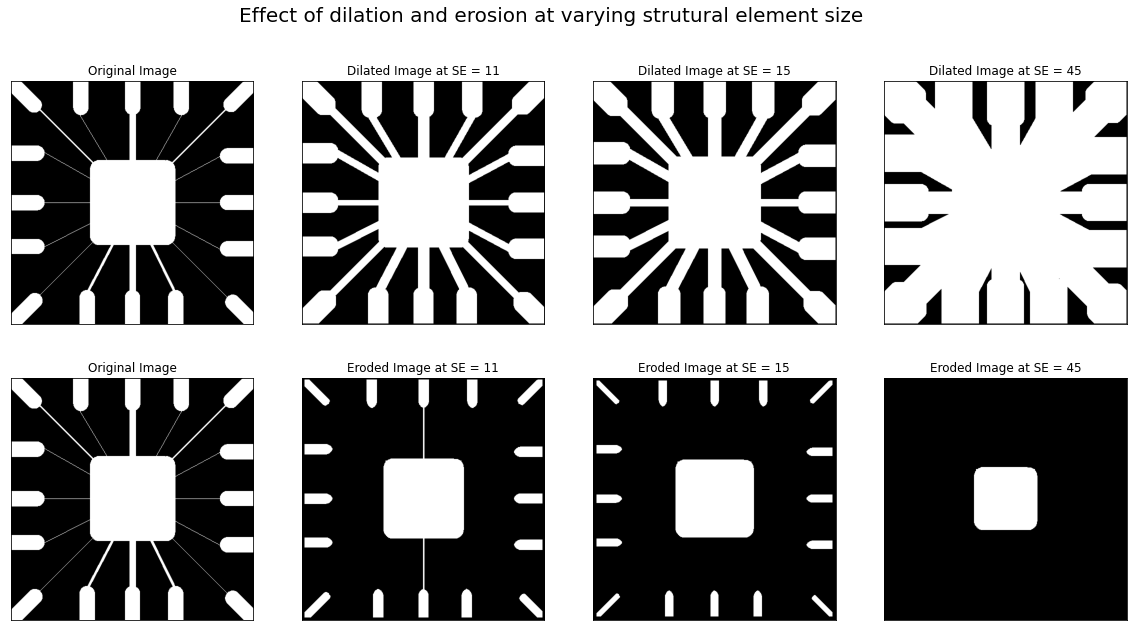

In [67]:
fig, ax = plt.subplots(2,4, figsize=(20,10))

ax[0][0].imshow(org_dil_ero_bin, cmap = 'gray')
ax[0][0].xaxis.set_ticks([])
ax[0][0].yaxis.set_ticks([])
ax[0][0].title.set_text('Original Image')

ax[0][1].imshow(dil_img_11, cmap = 'gray')
ax[0][1].xaxis.set_ticks([])
ax[0][1].yaxis.set_ticks([])
ax[0][1].title.set_text('Dilated Image at SE = 11')

ax[0][2].imshow(dil_img_15, cmap = 'gray')
ax[0][2].xaxis.set_ticks([])
ax[0][2].yaxis.set_ticks([])
ax[0][2].title.set_text('Dilated Image at SE = 15')

ax[0][3].imshow(dil_img_45, cmap = 'gray')
ax[0][3].xaxis.set_ticks([])
ax[0][3].yaxis.set_ticks([])
ax[0][3].title.set_text('Dilated Image at SE = 45')

ax[1][0].imshow(org_dil_ero_bin, cmap = 'gray')
ax[1][0].xaxis.set_ticks([])
ax[1][0].yaxis.set_ticks([])
ax[1][0].title.set_text('Original Image')

ax[1][1].imshow(ero_img_11, cmap = 'gray')
ax[1][1].xaxis.set_ticks([])
ax[1][1].yaxis.set_ticks([])
ax[1][1].title.set_text('Eroded Image at SE = 11')

ax[1][2].imshow(ero_img_15, cmap = 'gray')
ax[1][2].xaxis.set_ticks([])
ax[1][2].yaxis.set_ticks([])
ax[1][2].title.set_text('Eroded Image at SE = 15')

ax[1][3].imshow(ero_img_45, cmap = 'gray')
ax[1][3].xaxis.set_ticks([])
ax[1][3].yaxis.set_ticks([])
ax[1][3].title.set_text('Eroded Image at SE = 45')

fig.suptitle('Effect of dilation and erosion at varying strutural element size', fontsize=20)
plt.show()

**Explanation:** Performing dilation increases the size of the elements in the image. By using a larger SE, the size of the picture element can be increased further. Erosion does the opposite by decreasing the size of the picture elements. By performing erosion with a larger SE, the picture elements can be diminished further.

In [68]:
dil_img_11_2 = dil_ero_func(dil_img_11, se = 11, mode = 'd')
dil_img_11_3 = dil_ero_func(dil_img_11_2, se = 11, mode = 'd')

ero_img_11_2 = dil_ero_func(ero_img_11, se = 11, mode = 'e')
ero_img_11_3 = dil_ero_func(ero_img_11_2, se = 11, mode = 'e')

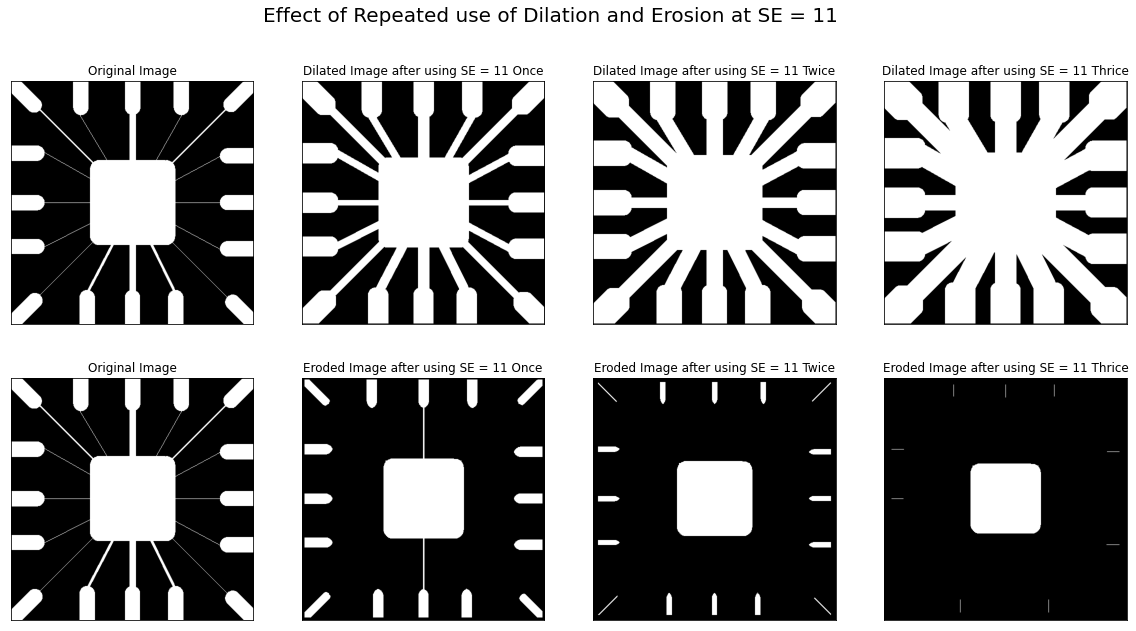

In [69]:
fig, ax = plt.subplots(2,4, figsize=(20,10))

ax[0][0].imshow(org_dil_ero_bin, cmap = 'gray')
ax[0][0].xaxis.set_ticks([])
ax[0][0].yaxis.set_ticks([])
ax[0][0].title.set_text('Original Image')

ax[0][1].imshow(dil_img_11, cmap = 'gray')
ax[0][1].xaxis.set_ticks([])
ax[0][1].yaxis.set_ticks([])
ax[0][1].title.set_text('Dilated Image after using SE = 11 Once')

ax[0][2].imshow(dil_img_11_2, cmap = 'gray')
ax[0][2].xaxis.set_ticks([])
ax[0][2].yaxis.set_ticks([])
ax[0][2].title.set_text('Dilated Image after using SE = 11 Twice')

ax[0][3].imshow(dil_img_11_3, cmap = 'gray')
ax[0][3].xaxis.set_ticks([])
ax[0][3].yaxis.set_ticks([])
ax[0][3].title.set_text('Dilated Image after using SE = 11 Thrice')

ax[1][0].imshow(org_dil_ero_bin, cmap = 'gray')
ax[1][0].xaxis.set_ticks([])
ax[1][0].yaxis.set_ticks([])
ax[1][0].title.set_text('Original Image')

ax[1][1].imshow(ero_img_11, cmap = 'gray')
ax[1][1].xaxis.set_ticks([])
ax[1][1].yaxis.set_ticks([])
ax[1][1].title.set_text('Eroded Image after using SE = 11 Once')

ax[1][2].imshow(ero_img_11_2, cmap = 'gray')
ax[1][2].xaxis.set_ticks([])
ax[1][2].yaxis.set_ticks([])
ax[1][2].title.set_text('Eroded Image after using SE = 11 Twice')

ax[1][3].imshow(ero_img_11_3, cmap = 'gray')
ax[1][3].xaxis.set_ticks([])
ax[1][3].yaxis.set_ticks([])
ax[1][3].title.set_text('Eroded Image after using SE = 11 Thrice')

fig.suptitle('Effect of Repeated use of Dilation and Erosion at SE = 11', fontsize=20)
plt.show()

**Explanation:** Performing dilation and erosion multiple times has the same effect as increasing the size of the SE. In the given diagram, the SE 11 has been used to dilate and erode once, twice, and thrice. We can see the effect is similar to increasing the size of the SE.

## Task-2

In [70]:
wood_dow_img = cv2.imread('/content/Fig0941(a)(wood_dowels).tif')
wood_dow_img_gray = np.array(cv2.cvtColor(wood_dow_img,cv2.COLOR_BGR2GRAY))
wood_dow_img_bin = to_binary(wood_dow_img_gray)

In [163]:
def granulate(img, se_size = 3):
  se = disk(se_size) #Disk sized SE is taken
  smoothed_image  = medfilt(img, 3) #Smoothing using Median Filter
  out_img = opening(smoothed_image, se) #Opening is performed on the smoothened image
  return out_img

In [72]:
g1 = granulate(wood_dow_img_bin, 1) #Performing Median Filtering Only
g2 = granulate(wood_dow_img_bin, 10)
g3 = granulate(wood_dow_img_bin, 20)
g4 = granulate(wood_dow_img_bin, 25)
g5 = granulate(wood_dow_img_bin, 30)

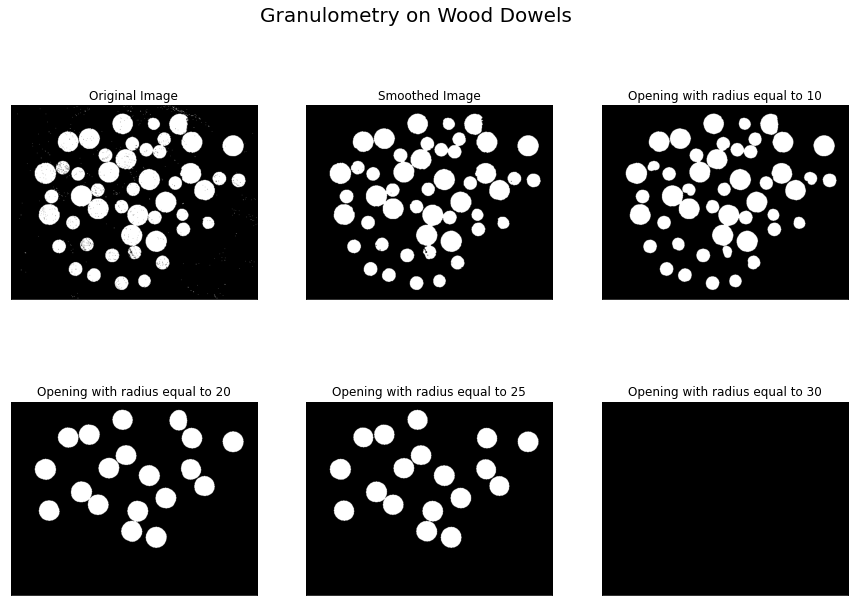

In [73]:
fig, ax = plt.subplots(2,3, figsize=(15,10))

ax[0][0].imshow(wood_dow_img_bin, cmap = 'gray')
ax[0][0].xaxis.set_ticks([])
ax[0][0].yaxis.set_ticks([])
ax[0][0].title.set_text('Original Image')

ax[0][1].imshow(g1, cmap = 'gray')
ax[0][1].xaxis.set_ticks([])
ax[0][1].yaxis.set_ticks([])
ax[0][1].title.set_text('Smoothed Image')

ax[0][2].imshow(g2, cmap = 'gray')
ax[0][2].xaxis.set_ticks([])
ax[0][2].yaxis.set_ticks([])
ax[0][2].title.set_text('Opening with radius equal to 10')

ax[1][0].imshow(g3, cmap = 'gray')
ax[1][0].xaxis.set_ticks([])
ax[1][0].yaxis.set_ticks([])
ax[1][0].title.set_text('Opening with radius equal to 20')

ax[1][1].imshow(g4, cmap = 'gray')
ax[1][1].xaxis.set_ticks([])
ax[1][1].yaxis.set_ticks([])
ax[1][1].title.set_text('Opening with radius equal to 25')

ax[1][2].imshow(g5, cmap = 'gray')
ax[1][2].xaxis.set_ticks([])
ax[1][2].yaxis.set_ticks([])
ax[1][2].title.set_text('Opening with radius equal to 30')

fig.suptitle('Granulometry on Wood Dowels', fontsize=20)
plt.show()

**Explanation:**  Granulometry is performed by repeatedly using the opening operation with an increasing SE size. The function granulate does this by first preprocessing the image using a median filter and then performing opening on the image. The preprocessing step is required to smoothen the image. Median filter is used in particular because the type of noise that might exist in the image is analogous to salt and pepper noise. We can see that increasing the size of SE results in removal of more wood dowels in the output image. However, the output of granulometry is to find the size or radius of the wood dowels which will be peformed in the next step.

In [74]:
def average_intensity_global(img):
  return np.average(img)

In [75]:
def avg_int_vary(img, start = 1, end = 35, step = 1):
  se_range = np.arange(start,end,step)
  out = []
  for se_size in se_range:
    gran_img = granulate(img, se_size)
    out.append(average_intensity_global(gran_img)) #Calculate Global average intensity and append it to the array
  return np.array(out)

In [76]:
start, end, step = 1, 35, 1
x = np.arange(start, end, step)
avg_int_list = avg_int_vary(wood_dow_img_bin, start, end, step)
avg_diff_list = abs(np.diff(avg_int_list))

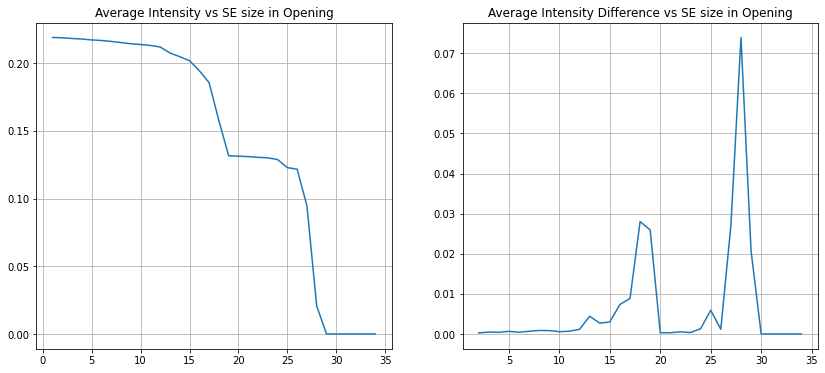

In [77]:
fig, ax = plt.subplots(1,2, figsize=(14,6))

ax[0].plot(x, avg_int_list)
ax[0].title.set_text('Average Intensity vs SE size in Opening')
ax[0].grid()

ax[1].plot(x[1:], avg_diff_list)
ax[1].title.set_text('Average Intensity Difference vs SE size in Opening')
ax[1].grid()

plt.show()

**Explanation:** A significant spike is seen at r ≈ 17 and r ≈ 27. This indicates that after taking a structural element with radius greater than 17 and 27, there is a significant change in the global average intensity. The significant change in intensity occurs due to the dissaperance of a large number of granules. When we perform opening with SE greater than the size of the granule, then the granules get reduced to nothing and results a drop in global average intensity. Hence, we can conclude that the wood granules in the picture have a radius of 17 and 27 pixels approximately.

## Task-3

In [172]:
blob_img = cv2.imread('/content/FigP0934(blobs_in_circular_arrangement).tif')
blob_img_gray = np.array(cv2.cvtColor(blob_img,cv2.COLOR_BGR2GRAY))

In [78]:
se_close = disk(30)
se_open = disk(60)
se_ero = disk(5)
se_dil = disk(5)

In [61]:
blob_img_gray_closed = closing(blob_img_gray, se_close)
blob_img_gray_open = opening(blob_img_gray_closed, se_open)

blob_img_gray_open_eroded = erosion(blob_img_gray_open, se_ero)
blob_img_gray_open_dilated = dilation(blob_img_gray_open, se_dil)

boundary_image = blob_img_gray_open_dilated - blob_img_gray_open_eroded

boundary_image_bin = to_binary(boundary_image)*255
superimposed_image = np.maximum(blob_img_gray, boundary_image_bin)

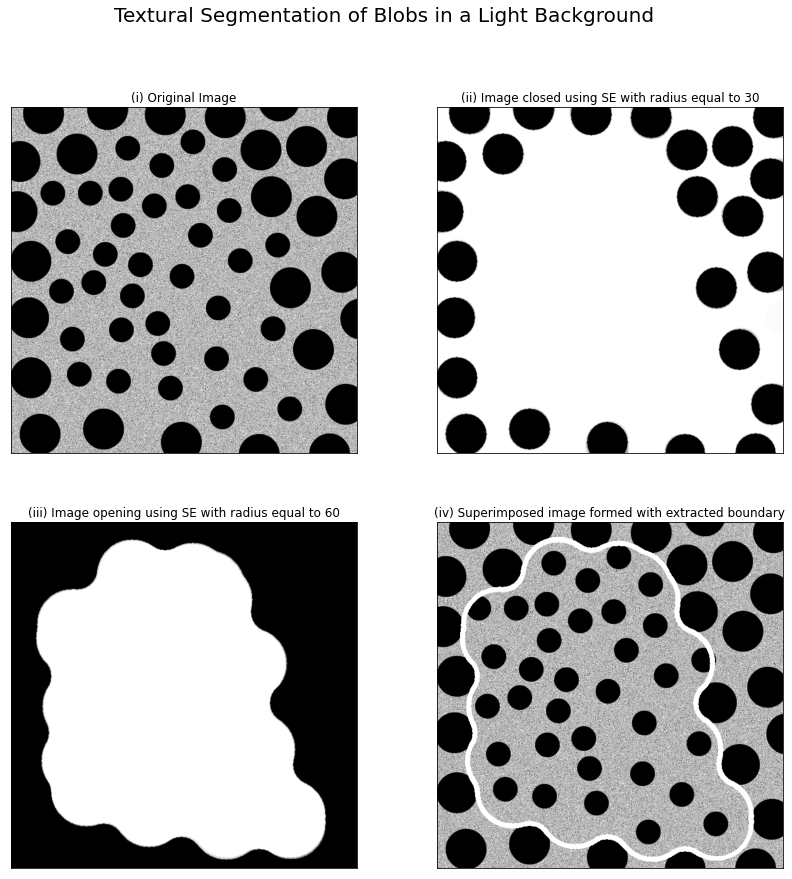

In [62]:
fig, ax = plt.subplots(2,2, figsize=(14,14))

ax[0][0].imshow(blob_img_gray, cmap = 'gray')
ax[0][0].xaxis.set_ticks([])
ax[0][0].yaxis.set_ticks([])
ax[0][0].title.set_text('(i) Original Image')

ax[0][1].imshow(blob_img_gray_closed, cmap = 'gray')
ax[0][1].xaxis.set_ticks([])
ax[0][1].yaxis.set_ticks([])
ax[0][1].title.set_text('(ii) Image closed using SE with radius equal to 30')

ax[1][0].imshow(blob_img_gray_open, cmap = 'gray')
ax[1][0].xaxis.set_ticks([])
ax[1][0].yaxis.set_ticks([])
ax[1][0].title.set_text('(iii) Image opening using SE with radius equal to 60')

ax[1][1].imshow(superimposed_image, cmap = 'gray')
ax[1][1].xaxis.set_ticks([])
ax[1][1].yaxis.set_ticks([])
ax[1][1].title.set_text('(iv) Superimposed image formed with extracted boundary')

fig.suptitle('Textural Segmentation of Blobs in a Light Background', fontsize=20)
plt.show()

**Explanation:** Textural segmentation can be performed to create the boundary around blobs of different sizes. First closing is performed with a disk size equal to or more than the radius of the smaller blobs. This will remove all the smaller blobs as seen in picture (ii) by diminishing them to white pixels. In picture (iii), we perform opening with SE equal to 60 which is greater than the maximum distance between blobs. This removes the larger blobs by diminishing them to black pixels. The radius 60 is chosen because the radius has to be larger than the maximum distance between the picture elements or the blobs. In our case, this distance is around 40, and we chose 60 to be on the safer side. The first disk size of 30 can be found using granulometry which will give us the area of the smaller blobs. However, I didn't perform granulometry in this report and simply tried various SE sizes and picked the one which removed all the smaller blobs. Finally, we perform morphological gradient on (iii) by dilating and eroding the image, and then taking the difference. This gives us the boundary of the differing areas which can then be superimposed to the original image to get the final output in (iv).

## Task-4

### Task-4a

In [122]:
bubble_image = cv2.imread('/content/FigP0936(bubbles_on_black_background).tif')
bubble_image_gray = np.array(cv2.cvtColor(bubble_image,cv2.COLOR_BGR2GRAY))

In [123]:
#First we color the boundary pixels to white
bubble_image_white_bound = bubble_image_gray.copy()

m,n = bubble_image_white_bound.shape

for row in range(m-1):
  bubble_image_white_bound[row, 0], bubble_image_white_bound[row, n-1] = 255, 255

for col in range(n-1):
  bubble_image_white_bound[0,col], bubble_image_white_bound[m-1,col] = 255, 255

#Extract the connected components
_, labels = cv2.connectedComponents(bubble_image_white_bound)

#Add the connected components to a black background
boundary_bubbles = np.zeros((m,n))
boundary_bubbles[labels == 1] = 1

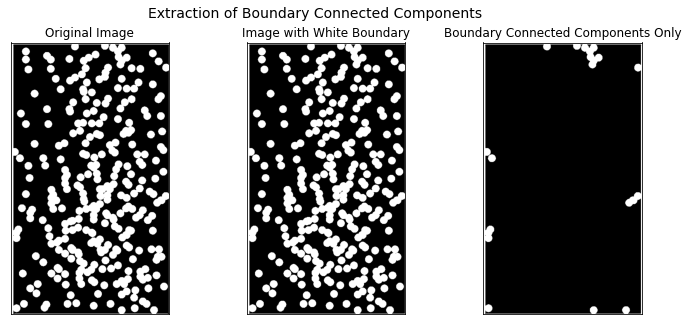

In [126]:
fig, ax = plt.subplots(1,3, figsize=(12,5))

ax[0].imshow(bubble_image_gray, cmap = 'gray')
ax[0].xaxis.set_ticks([])
ax[0].yaxis.set_ticks([])
ax[0].title.set_text('Original Image')

ax[1].imshow(bubble_image_white_bound, cmap = 'gray')
ax[1].xaxis.set_ticks([])
ax[1].yaxis.set_ticks([])
ax[1].title.set_text('Image with White Boundary')

ax[2].imshow(boundary_bubbles, cmap = 'gray')
ax[2].xaxis.set_ticks([])
ax[2].yaxis.set_ticks([])
ax[2].title.set_text('Boundary Connected Components Only')

fig.suptitle('Extraction of Boundary Connected Components', fontsize=14)
plt.show()

**Explanation:** We first put a white boundary of one pixel width around the image so that the image boundary connects to the boundary bubbles. Afterward, we apply the `connectedComponents()` from cv2 which returns a label array as the second element of a tuple. The label array is of the same dimensions as the input image and gives connected component IDs to the pixel positions. This can be interpreted similar to sementic segmentation. For example - pixels with value 1 belong to the first connected component. In this case, the boundary connected component is given the label ID 1. We create a new image with all black pixels and insert the pixels with label ID 1 as 255. Finally, we display the outputs as graphs.

### Task-4b, c

In [129]:
bubble_image_binary = to_binary(bubble_image_gray)

In [130]:
start, end, step = 1, 30, 1
x = np.arange(start, end, step)
avg_int_list = avg_int_vary(bubble_image_binary, start, end, step)
avg_diff_list = abs(np.diff(avg_int_list))

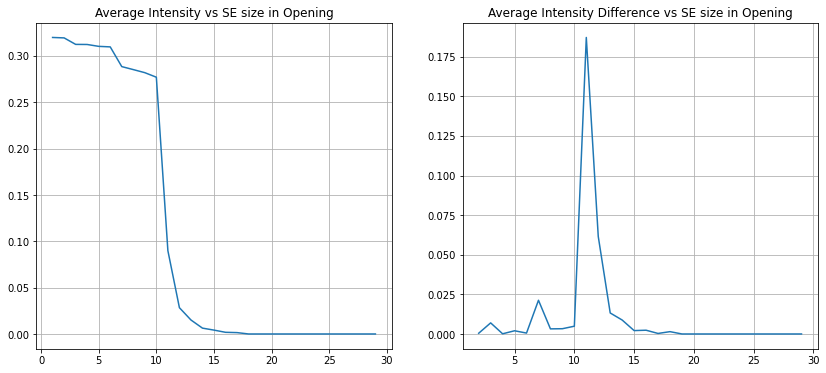

In [131]:
fig, ax = plt.subplots(1,2, figsize=(14,6))

ax[0].plot(x, avg_int_list)
ax[0].title.set_text('Average Intensity vs SE size in Opening')
ax[0].grid()

ax[1].plot(x[1:], avg_diff_list)
ax[1].title.set_text('Average Intensity Difference vs SE size in Opening')
ax[1].grid()

plt.show()

From the graph we can infer that the average radius of the bubble pixels is around 11. So, area of the bubble should be pi*r^2. We take the upper bound of radius as 10.5 and lower bound as 11.5.

In [156]:
radius1, radius2 = 10.75, 11.25
bubble_area_lower = np.pi*radius1*radius1
bubble_area_higher = np.pi*radius2*radius2
print('The lower and upper bounds of the area of bubbles is',np.floor(bubble_area_lower), 'and',np.ceil(bubble_area_higher),'respectively.')

The lower and upper bounds of the area of bubbles is 363.0 and 398.0 respectively.


In [157]:
#Task - 4b
n_labels, labels, stats, _ = cv2.connectedComponentsWithStats(bubble_image_gray)
non_overlap_bubbles = np.zeros((m,n), dtype = 'uint8')
 
for current_label in range(1, n_labels):   
    area = stats[current_label, cv2.CC_STAT_AREA]
    if (area>=bubble_area_lower) and (area <= bubble_area_higher): #Connected Components of size close to bubble area
        mask = (labels == current_label).astype("uint8") * 255      #Generate a mask to extract the connected components
        non_overlap_bubbles = cv2.bitwise_or(non_overlap_bubbles, mask)

#Task - 4c
overlap_bubbles = bubble_image_gray - non_overlap_bubbles 

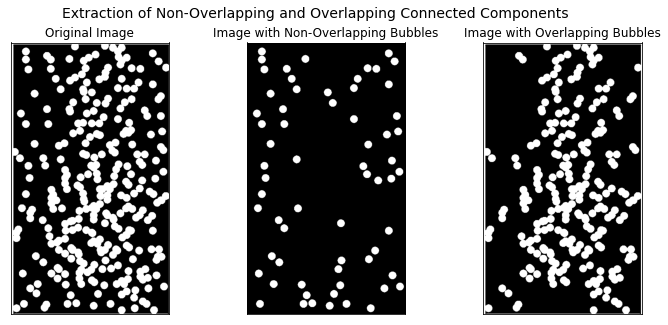

In [158]:
fig, ax = plt.subplots(1,3, figsize=(12,5))

ax[0].imshow(bubble_image_gray, cmap = 'gray')
ax[0].xaxis.set_ticks([])
ax[0].yaxis.set_ticks([])
ax[0].title.set_text('Original Image')

ax[1].imshow(non_overlap_bubbles, cmap = 'gray')
ax[1].xaxis.set_ticks([])
ax[1].yaxis.set_ticks([])
ax[1].title.set_text('Image with Non-Overlapping Bubbles')

ax[2].imshow(overlap_bubbles, cmap = 'gray')
ax[2].xaxis.set_ticks([])
ax[2].yaxis.set_ticks([])
ax[2].title.set_text('Image with Overlapping Bubbles')

fig.suptitle('Extraction of Non-Overlapping and Overlapping Connected Components', fontsize=14)
plt.show()

**Explanation:** To extract overlapping and non-overlapping connected components, we need to first know the size of a single bubble. The radius of the bubble can be inferred using granulometry. Afterward, we can use the area of circle to determine the area of the bubble. In our case, we took upper and lower bounds for the radius based on granulometry and determined the upper and lower bounds for area. After we extracted the connected componenets with a similar function `connectedComponentsWithStats()` which returns a 4 element tuple, but our primary interest lies with the first three labels which give us the total number of labels, the labels array which was used in the previous problem, and the values array which will be used to extract the areas for the connected components. We would them interate over the connected components, and extract their areas using the values array. If the array falls between the upper and lower area bounds, then it means the connected component has an area close to the area of a single bubble. We can hence can the connected component a single bubble or a non-overlapping bubble. We then generate a mask for that connected component in order to extract it from the input image. Afterward, applying bitwise OR to the output image which was initialized to a black image, we keep appending the non-overlapping bubbles. In the end of the loop, all the non-overlapping bubbles are appended to our output image which is also our desired output.

For the last task, we can simply subtract the non-overlapping bubbles from the original image to get the image with overlapping bubbles only.